In [1]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline


In [2]:
filename = '/notebooks/data/tr_eikon_eod_data.csv' 

f = open(filename, 'r') 
f.readlines()[:5] 


data = pd.read_csv(filename, 
index_col=0,
parse_dates=True) 

print(data.info()) 



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 12 columns):
AAPL.O    1972 non-null float64
MSFT.O    1972 non-null float64
INTC.O    1972 non-null float64
AMZN.O    1972 non-null float64
GS.N      1972 non-null float64
SPY       1972 non-null float64
.SPX      1972 non-null float64
.VIX      1972 non-null float64
EUR=      1972 non-null float64
XAU=      1972 non-null float64
GDX       1972 non-null float64
GLD       1972 non-null float64
dtypes: float64(12)
memory usage: 200.3 KB
None


In [3]:
data['GLD'].tail(10)

Date
2017-10-18    121.67
2017-10-19    122.39
2017-10-20    121.61
2017-10-23    121.80
2017-10-24    121.33
2017-10-25    121.35
2017-10-26    120.33
2017-10-27    120.90
2017-10-30    121.13
2017-10-31    120.67
Name: GLD, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe521dcc50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fbe4ffa44e0>], dtype=object)

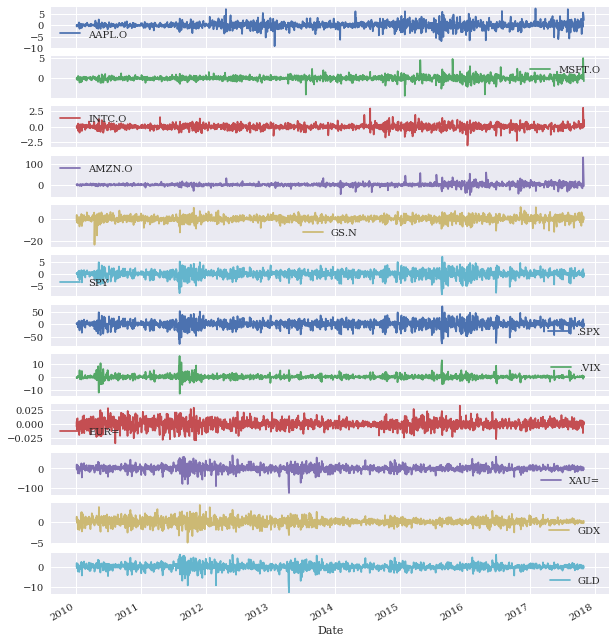

In [4]:
data.diff().plot(figsize=(10, 12), subplots=True)

In [5]:
print(data.describe())

            AAPL.O       MSFT.O       INTC.O       AMZN.O         GS.N  \
count  1972.000000  1972.000000  1972.000000  1972.000000  1972.000000   
mean     86.530152    40.586752    27.701411   401.154006   163.614625   
std      34.043491    14.394848     5.950847   257.115788    37.165334   
min      27.435687    23.010000    17.665000   108.610000    87.700000   
25%      57.571728    28.120000    22.232500   202.665000   144.232500   
50%      84.632058    36.540000    26.410000   306.425000   162.090000   
75%     111.867500    50.085000    33.740000   559.447500   184.112500   
max     169.040000    83.890000    45.490000  1110.850000   252.890000   

               SPY         .SPX         .VIX         EUR=         XAU=  \
count  1972.000000  1972.000000  1972.000000  1972.000000  1972.000000   
mean    172.835399  1727.538342    17.209498     1.252613  1352.471593   
std      42.325489   424.345659     5.918398     0.117224   195.383137   
min     102.200000  1022.580000     9

In [6]:
# changes over time

print(data.diff().mean())

AAPL.O    0.070252
MSFT.O    0.026499
INTC.O    0.012486
AMZN.O    0.492836
GS.N      0.035211
SPY       0.072968
.SPX      0.731745
.VIX     -0.005003
EUR=     -0.000140
XAU=      0.076712
GDX      -0.012801
GLD       0.005515
dtype: float64


In [7]:
print(data.pct_change().round(3).head())

            AAPL.O  MSFT.O  INTC.O  AMZN.O   GS.N    SPY   .SPX   .VIX   EUR=  \
Date                                                                            
2010-01-04     NaN     NaN     NaN     NaN    NaN    NaN    NaN    NaN    NaN   
2010-01-05   0.002   0.000  -0.000   0.006  0.018  0.003  0.003 -0.034 -0.003   
2010-01-06  -0.016  -0.006  -0.003  -0.018 -0.011  0.001  0.001 -0.010  0.003   
2010-01-07  -0.002  -0.010  -0.010  -0.017  0.020  0.004  0.004 -0.005 -0.007   
2010-01-08   0.007   0.007   0.011   0.027 -0.019  0.003  0.003 -0.049  0.007   

             XAU=    GDX    GLD  
Date                             
2010-01-04    NaN    NaN    NaN  
2010-01-05 -0.001  0.010 -0.001  
2010-01-06  0.018  0.024  0.016  
2010-01-07 -0.006 -0.005 -0.006  
2010-01-08  0.004  0.015  0.005  


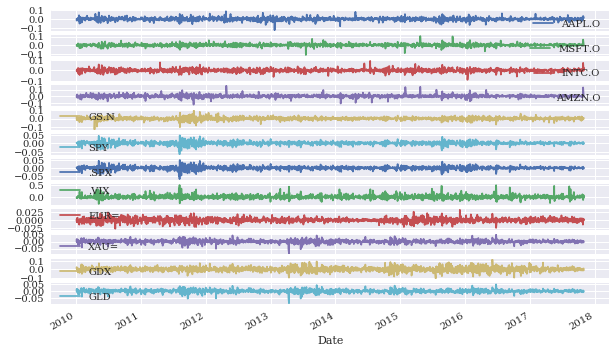

In [8]:
data.pct_change().plot(figsize=(10, 6), subplots=True); 

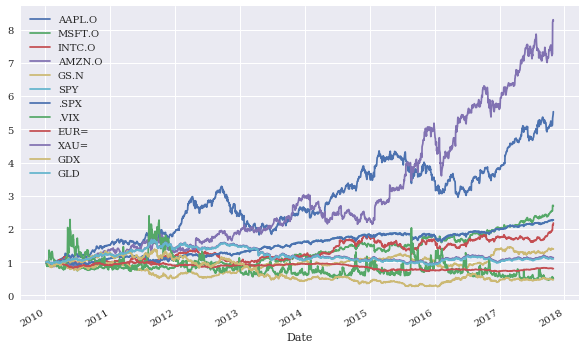

In [9]:
rets = np.log(data / data.shift(1))
rets.cumsum().apply(np.exp).plot(figsize=(10, 6)); 

[                       0%                       ]

[*********************100%***********************]  1 of 1 downloaded

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe37ad6f28>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fbe37e4f710>], dtype=object)

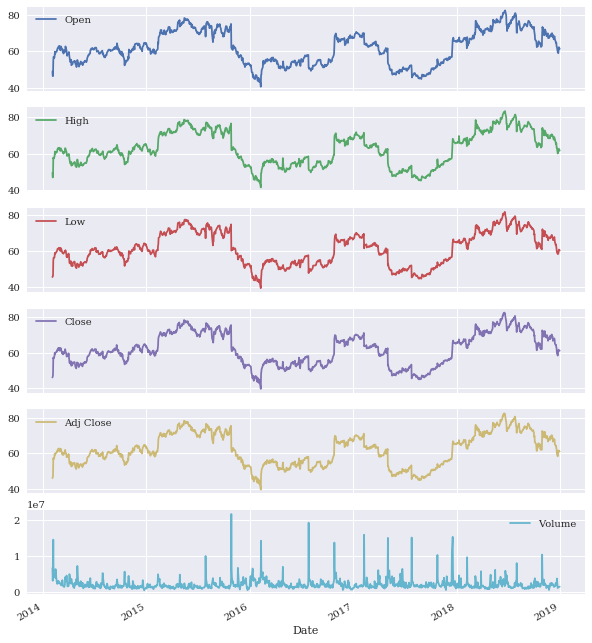

In [10]:
# Rolling statistics
# sym = 'AAPL.O'
# data = pd.DataFrame(data[sym]).dropna()
# print(data.tail())
import matplotlib.pyplot as plt
import fix_yahoo_finance as yf

sym='Close'

data = yf.download('AKAM','2014-02-01','2019-01-01')
data.plot(figsize=(10, 12), subplots=True)

In [11]:
data = data.dropna()

In [12]:
# get all statistics

window = 20
data['min'] = data[sym].rolling(window=window).min()
data['mean'] = data[sym].rolling(window=window).mean()
data['std'] = data[sym].rolling(window=window).std()
data['median'] = data[sym].rolling(window=window).median()
data['max'] = data[sym].rolling(window=window).max()
data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()


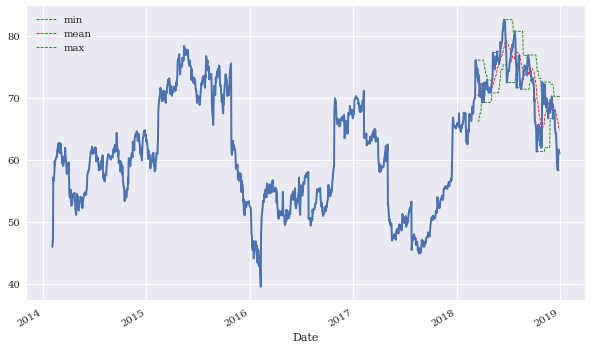

In [13]:
ax = data[['min', 'mean', 'max']].iloc[-200:].plot(
    figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8) 
data[sym].iloc[:].plot(ax=ax, lw=2.0); 

In [19]:
data['SMA1'] = data[sym].rolling(window=7).mean()
data['SMA2'] = data[sym].rolling(window=50).mean()

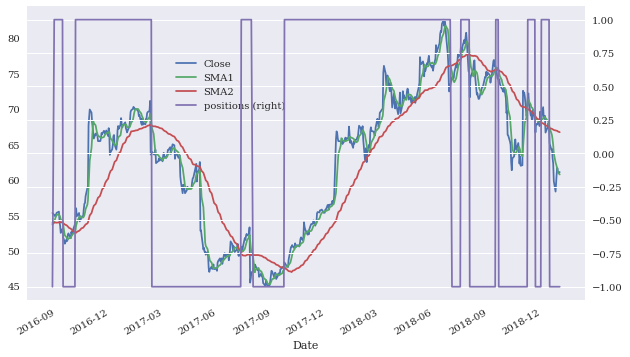

In [20]:
data.dropna(inplace=True)

data['positions'] = np.where(data['SMA1'] > data['SMA2'],1, -1) 
ax = data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

In [30]:
filename = '/notebooks/data/tr_eikon_eod_data.csv'

f = open(filename, 'r')
f.readlines()[:5]


raw = pd.read_csv(filename,
                   index_col=0,
                   parse_dates=True)

data = raw[['.SPX', '.VIX']].dropna()

rets = np.log(data/ data.shift(1))

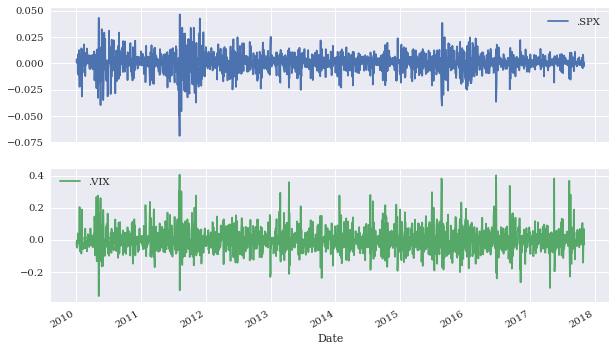

In [31]:
rets.dropna(inplace=True)

rets.plot(subplots=True, figsize=(10, 6));

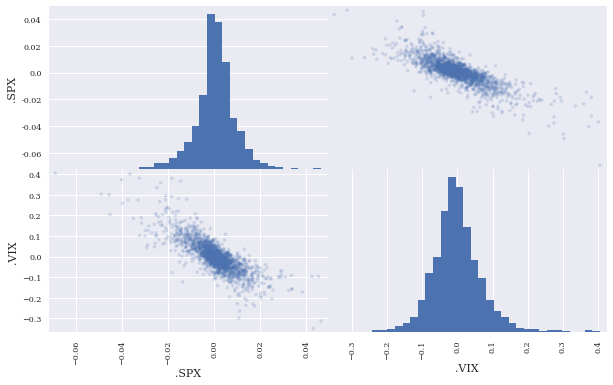

In [32]:
pd.plotting.scatter_matrix(rets,
alpha=0.2,
diagonal='hist',
hist_kwds={'bins': 35},
figsize=(10, 6));

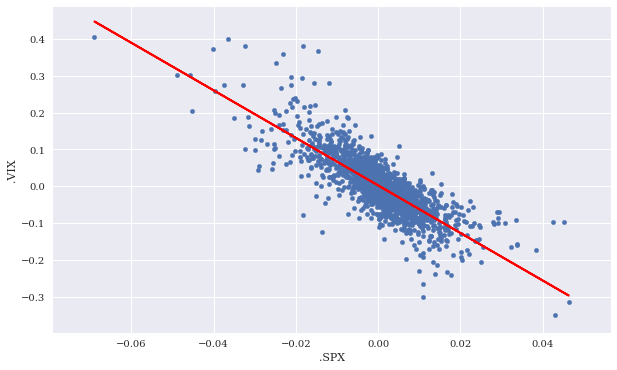

In [34]:
reg = np.polyfit(rets['.SPX'], rets['.VIX'], deg=1) 

ax = rets.plot(kind='scatter', x='.SPX', y='.VIX', figsize=(10, 6)) 
ax.plot(rets['.SPX'], np.polyval(reg, rets['.SPX']), 'r', lw=2); 

In [37]:
print(rets.corr())



          .SPX      .VIX
.SPX  1.000000 -0.808372
.VIX -0.808372  1.000000


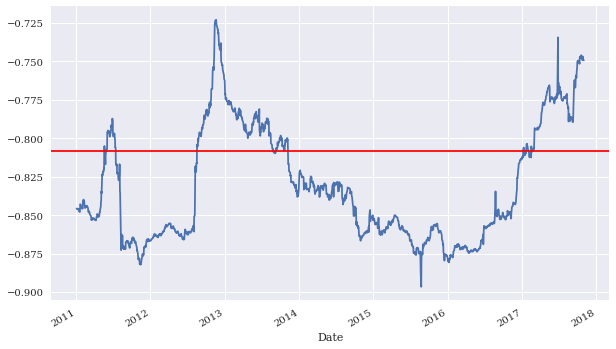

In [38]:
ax = rets['.SPX'].rolling(window=252).corr(rets['.VIX']).plot(figsize=(10, 6))
ax.axhline(rets.corr().iloc[0, 1], c='r');